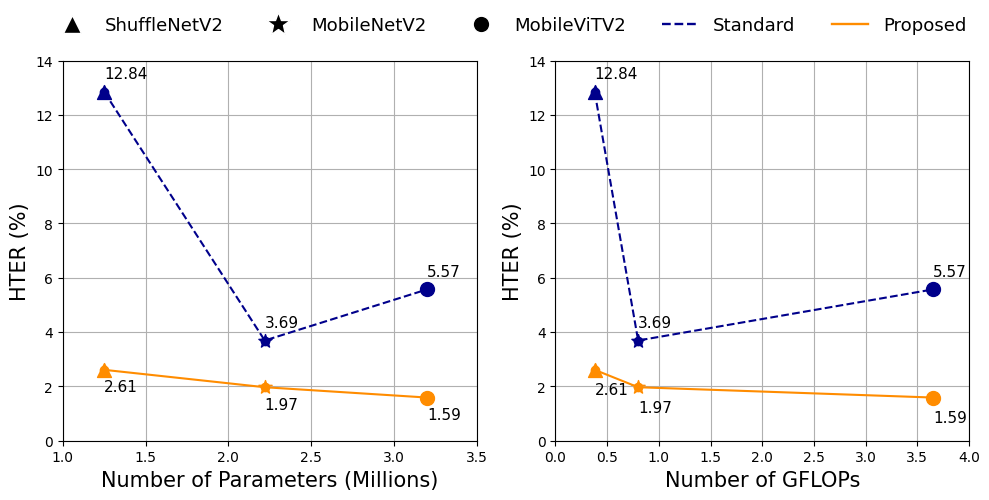

In [6]:
import matplotlib.pyplot as plt

# Data
models = ["ShuffleNetV2", "MobileNetV2", "MobileVitV2"]
parameters = [1.25, 2.22, 3.2]  # in millions
gflops = [0.38, 0.8, 3.65]  # GFLOPs
hter_before = [12.84, 3.69, 5.57]  # Standard HTER
hter_after = [2.61, 1.97, 1.59]  # Proposed HTER

# Markers for each model
model_markers = {"ShuffleNetV2": "^", "MobileNetV2": "*", "MobileVitV2": "o"}
colors = ["darkblue", "darkorange"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Subplot 1: HTER vs. Parameters ---
axes[0].plot(parameters, hter_before, linestyle="dashed", color=colors[0], label="Standard", marker="o")
axes[0].plot(parameters, hter_after, linestyle="solid", color=colors[1], label="Proposed", marker="o")

# Plot individual points with markers
for i, model in enumerate(models):
    axes[0].scatter(parameters[i], hter_before[i], marker=model_markers[model], color=colors[0], s=100)
    axes[0].scatter(parameters[i], hter_after[i], marker=model_markers[model], color=colors[1], s=100)
    axes[0].text(parameters[i], hter_before[i] + 0.5, f"{hter_before[i]:.2f}", fontsize=11)
    axes[0].text(parameters[i], hter_after[i] - 0.8, f"{hter_after[i]:.2f}", fontsize=11)

axes[0].set_xlabel("Number of Parameters (Millions)", fontsize=15)
axes[0].set_ylabel("HTER (%)", fontsize=15)
axes[0].grid(True)

# --- Subplot 2: HTER vs. GFLOPs ---
axes[1].plot(gflops, hter_before, linestyle="dashed", color=colors[0], label="Standard", marker="o")
axes[1].plot(gflops, hter_after, linestyle="solid", color=colors[1], label="Proposed", marker="o")

# Plot individual points with markers
for i, model in enumerate(models):
    axes[1].scatter(gflops[i], hter_before[i], marker=model_markers[model], color=colors[0], s=100)
    axes[1].scatter(gflops[i], hter_after[i], marker=model_markers[model], color=colors[1], s=100)
    axes[1].text(gflops[i], hter_before[i] + 0.5, f"{hter_before[i]:.2f}", fontsize=11)
    axes[1].text(gflops[i], hter_after[i] - 0.9, f"{hter_after[i]:.2f}", fontsize=11)

axes[1].set_xlabel("Number of GFLOPs", fontsize=15)
axes[1].set_ylabel("HTER (%)", fontsize=15)
axes[1].grid(True)

# Custom legend with both model markers & line styles
legend_elements = [
    plt.Line2D([0], [0], marker="^", color="w", markerfacecolor="black", markersize=13, label="ShuffleNetV2"),
    plt.Line2D([0], [0], marker="*", color="w", markerfacecolor="black", markersize=18, label="MobileNetV2"),
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="black", markersize=12, label="MobileViTV2"),
    plt.Line2D([0], [0], linestyle="dashed", color=colors[0], linewidth=1.7, label="Standard"),
    plt.Line2D([0], [0], linestyle="solid", color=colors[1], linewidth=1.7, label="Proposed"),
]

# fig.legend(handles=legend_elements, loc="upper center", ncol=5, fontsize=12)
fig.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.515, 1.01), ncol=5, fontsize=13.1, frameon=False)

# Set axis limits for better visualization
axes[0].set_xlim(1, 3.5)  # X-axis range for No. of Parameters
axes[0].set_ylim(0, 14)   # Y-axis range for HTER

axes[1].set_xlim(0, 4)    # X-axis range for No. of GFLOPs
axes[1].set_ylim(0, 14)   # Y-axis range for HTER


# Show the figure
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust layout to fit legend at the top

# Save the figure
fig.savefig("hter_comparison.png")
plt.show()
